##  1 Understanding the Raw Data

### 1.1 Fetch Companies Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = './Investment_data/'

#Import Companies txt file
companies = pd.read_csv(path+'companies.txt', encoding = 'ISO-8859-1', sep='\t')
#Import mapping csv file
mapping = pd.read_csv(path+'mapping.csv')
#Import rounds2.csv
rounds2 = pd.read_csv(path+'rounds2.csv', encoding = 'ISO-8859-1')

### 1.2 Describe the data

#### 1.2.1 Describe Company Data

In [2]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


We can notice that in companies dataset, some of the columns like category_list, country_code, state_code, region, city, founded_at has NAN values.

In [3]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Alterpoint,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


We can notice that there seems to be duplicates in name column, whereas permalink has as many dataset as that of total row count. Also, permalink is present in rounds2 dataset. Therefore, permalink can be the index or unique column for companies dataset.

In [4]:
# Count of unique Companies in the Companies dataset
companies.permalink.nunique()

66368

#### 1.2.2 Describe Mapping Data

In [5]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


#### 1.2.3 Describe Rounds2 Data

In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


We can notice that in rounds2 dataset, company_permalink has values some of which are in Upper case and some on lower case. Taking unique on such values may not result in the actual count of unique companies in this dataset. Also, there are NAN values in funding_round_code and raised_amound_usd columns.

## 1.3 Data Consistency

#### 1.3.1 Set Data Consistenecy for Companies table

In [7]:
#Correct the Consistency of main columns like permalink, category_list and country_code in Companies Dataset
companies[['permalink','category_list','state_code','region','city']] = companies[['permalink','category_list','state_code','region','city']].apply(lambda x: x.str.lower())

#Set the country_code to lower cases in Company Dataset.
companies.country_code = companies.country_code.str.upper()

#### 1.3.2 Set Data Consistenecy for Rounds2 table

In [8]:
#Set the company unique id, funding_round_type to lower cases in Rounds2 Dataset.
rounds2[['company_permalink','funding_round_type']] = rounds2[['company_permalink','funding_round_type']].apply(lambda x: x.str.lower())

# Count of Companies in the rounds2 dataset
rounds2.company_permalink.nunique()

66370

#### 1.3.3 Set Data Consistenecy for Mapping table

In [9]:
#Set the funding_round_type to lower cases in Rounds2 Dataset.
mapping.category_list = mapping.category_list.str.lower()

#### 1.3.4 Companies present in Round2 and missing in Companies Dataset

In [10]:
#Companies present in Rounds2 Dataset not present in Companies
len(rounds2[~(rounds2.company_permalink.isin(companies.permalink))])

7

### 1.4 Data Cleaning and Manipulation

#### 1.4.1 Remove unwanted columns from Companies, Rounds2 and mapping Dataset

In [11]:
#Drop unwanted columns from Company, Rounds2 and mapping dataset
companies = companies.drop(['homepage_url','status','founded_at'],axis=1)

rounds2 = rounds2.drop(['funding_round_permalink','funding_round_code','funded_at'],axis=1)

mapping = mapping.dropna(how="any", subset=['category_list'])

#### 1.4.2 Merge the dataset

In [12]:
#Merge the companies and Rounds2 Dataset using inner join. Thereby the companies not present in round2 are removed.
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
#Observations present in the merged Dataset
master_frame.count()

company_permalink     114942
funding_round_type    114942
raised_amount_usd      94958
permalink             114942
name                  114941
category_list         111535
country_code          106271
state_code            104003
region                104782
city                  104785
dtype: int64

#### 1.4.3 Data imputation or Deletion

In [13]:
#Calculate the percentage of missing values in each of the merged columns
round(100*(master_frame.isnull().sum(axis=0)/len(master_frame.index)),2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
permalink              0.00
name                   0.00
category_list          2.96
country_code           7.54
state_code             9.52
region                 8.84
city                   8.84
dtype: float64

raised_amount_usd is one of the columns that will be used for analysis and it has significant amount of empty data. Imputing such high dataset might introduce bias in the final analysis. Hence decided to remove all the rows having empty raised_amount_usd

In [14]:
# Remove rows which have empty data in raised_amount_usd column.
master_frame = master_frame.dropna(how='any', subset=['raised_amount_usd'])

In [15]:
round(100*(master_frame.isnull().sum(axis=0)/len(master_frame.index)),2)

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
permalink             0.00
name                  0.00
category_list         1.10
country_code          6.16
state_code            8.01
region                7.42
city                  7.42
dtype: float64

In [16]:
#Check if for country codes, the data can be imputed by looking at the state/region/city columns
countryNaN_view = master_frame[master_frame['country_code'].isnull()]
round(100*(countryNaN_view.isnull().sum(axis=0)/len(countryNaN_view.index)),2)

company_permalink       0.00
funding_round_type      0.00
raised_amount_usd       0.00
permalink               0.00
name                    0.00
category_list           7.95
country_code          100.00
state_code            100.00
region                100.00
city                  100.00
dtype: float64

State, region and city columns are empty for all the missing country_code. So, country code cannot be derived from these columns. Also, there are 137 unique country codes, adding one frequent country code data might end up causing bias.

So, have decided to remove State_code, region, city columns. Rows containing missing values in Country_code column will be removed

In [17]:
# Remove rows which have empty data in Country_code and Category_list columns.
master_frame = master_frame.dropna(how='any', subset=['country_code'])

#Remove State, region and city columns
master_frame = master_frame.drop(['state_code','region','city'],axis=1)

In [18]:
round(100*(master_frame.isnull().sum(axis=0)/len(master_frame.index)),2)

company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
permalink             0.00
name                  0.00
category_list         0.65
country_code          0.00
dtype: float64

#### 1.4.4 Detect outliers

In [19]:
master_frame.describe()

,raised_amount_usd
count,8.910800e+04
mean,1.047060e+07
std,1.114606e+08
min,0.000000e+00
25%,3.700000e+05
50%,1.800000e+06
75%,7.110625e+06
max,2.127194e+10


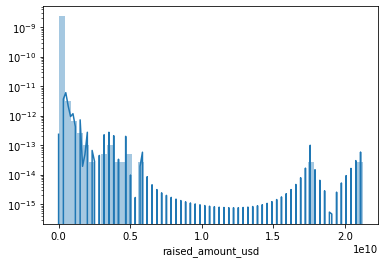

In [20]:
sns.distplot(master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

As can be seen in the plot, the distribution is not normal and seems to have significant amount of outliers. So cannot apply 1-2-3 rule to remove outliers

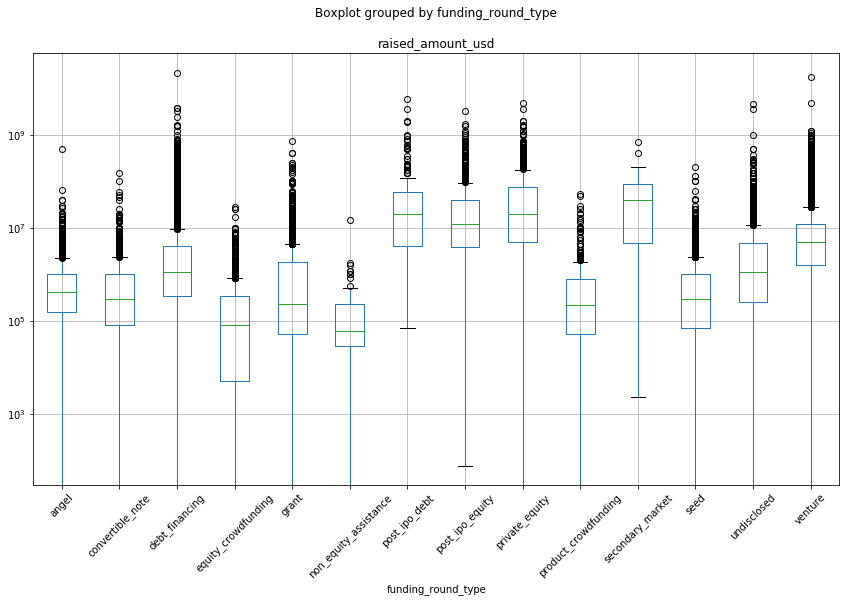

In [21]:
master_frame.boxplot(column ='raised_amount_usd', by='funding_round_type', figsize=(14,8), rot=45)
plt.yscale('log')

As can be seen in the plot, each of the funding type has outliers at a different range. Applying a common range might end up causing bias towards funding type which does not necessarily have data in that range. So will come up with ranges specific to the funding types(Venture, Seed, angel, Private Equity)and remove the outliers.

In [22]:
#Remove outlier by using the 95 percentile as the upper limit and 5% as the lower limit. Pass the main data frame and the finding type
#The function will remove the outliers.
def remove_Outlier (df, fundingType):
    upperlimit = df[df['funding_round_type']==fundingType]['raised_amount_usd'].quantile(0.95)
    lowerlimit = df[df['funding_round_type']==fundingType]['raised_amount_usd'].quantile(0.05)
    print("funding Type - {} has Upper Limit - {} and Lower limit - {} \n".format(fundingType, upperlimit, lowerlimit ))
    df[df['funding_round_type']==fundingType] = df[(df['funding_round_type']==fundingType) & (df.raised_amount_usd< upperlimit) & (df.raised_amount_usd> lowerlimit)]

In [23]:
#outlier_range = 2 * (master_frame['raised_amount_usd'].quantile(0.75) - master_frame['raised_amount_usd'].quantile(0.25))
#upper_limit = outlier_range + master_frame['raised_amount_usd'].quantile(0.75)
#lower_limit = master_frame['raised_amount_usd'].quantile(0.25) - outlier_range 
#upper_limit

In [24]:
remove_Outlier (master_frame, 'venture')
remove_Outlier (master_frame, 'angel')
remove_Outlier (master_frame, 'seed')
remove_Outlier (master_frame, 'private_equity')

funding Type - venture has Upper Limit - 39864000.0 and Lower limit - 210000.0 

funding Type - angel has Upper Limit - 2882865.599999993 and Lower limit - 30000.0 

funding Type - seed has Upper Limit - 2500000.0 and Lower limit - 18000.0 

funding Type - private_equity has Upper Limit - 292999999.9999995 and Lower limit - 329482.6 



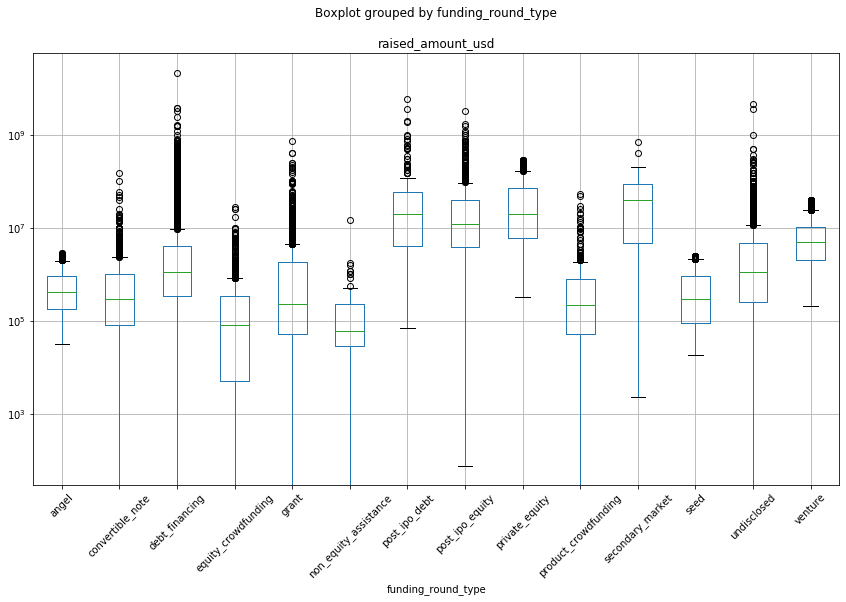

In [25]:
master_frame.boxplot(column ='raised_amount_usd', by='funding_round_type', figsize=(14,8), rot=45)
plt.yscale('log')

## 2 Funding Type Analysis 

In [26]:
#Filter the master frame to have 'venture','angel','seed' and 'private_equity' funding Type
master_frame_subset = master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]

#Get mean per investment Type, sort the values in descending order and format the numbers to show 2 decimal digits
fundType_Inv_view = round(master_frame_subset.groupby('funding_round_type').raised_amount_usd.mean().sort_values(ascending=False),2)

fundType_Inv_view = fundType_Inv_view.copy()

In [27]:
fundType_Inv_view

funding_round_type
private_equity    46155589.06
venture            7814558.48
angel               613204.08
seed                551788.73
Name: raised_amount_usd, dtype: float64

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, Venture fund is most suitable among Seed, Angel, Venture and private Equity fund.

In [28]:
#Filter only the venture investment type data from master_frame
master_frame_venture = master_frame[master_frame.funding_round_type == 'venture']

## 3 Country Analysis

In [29]:
#Group master frames by Countries
countryCodeGrp = master_frame_venture.groupby('country_code')

top9_grp = countryCodeGrp.raised_amount_usd.sum().sort_values(ascending=False).head(9)
top9_grp

country_code
USA    2.584102e+11
GBR    1.372554e+10
CHN    1.295233e+10
CAN    7.968753e+09
IND    6.649442e+09
ISR    6.034211e+09
FRA    5.557945e+09
DEU    4.107639e+09
CHE    2.013297e+09
Name: raised_amount_usd, dtype: float64

USA - USA, GBR - Great Britain, CAN - Canada are the top 3 countries investment wise among the English speaking countries.

In [30]:
#Create a dataframe containing top 9 conuntries as per the investment
top9 = master_frame_venture[master_frame_venture.country_code.isin(top9_grp.index)].copy()
top9.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,/organization/-fame,#fame,media,IND
4,/organization/0-6-com,venture,2000000.0,/organization/0-6-com,0-6.com,curated web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,/organization/0xdata,H2O.ai,analytics,USA
11,/organization/0xdata,venture,1700000.0,/organization/0xdata,H2O.ai,analytics,USA


## 4 Sector Analysis 1

In [31]:
#Split the Category list and assign the primary category to the a separate column named primary_sector 
primary_sector = top9.category_list.str.split("|", n=1, expand=True)
top9['primary_sector'] = primary_sector[0]

In [32]:
#Convert Mapping table into categorical tables
mapping['main_sector'] = pd.get_dummies(mapping).idxmax(1)

mapping = mapping[['category_list','main_sector']]
mapping.head()

,category_list,main_sector
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"
5,active lifestyle,Health


In [33]:
#merge main data frame with mapping dataset
top9 = pd.merge(top9, mapping, how="inner", left_on="primary_sector", right_on="category_list")
top9.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list_x,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,venture,10000000.0,/organization/-fame,#fame,media,IND,media,media,Entertainment
1,/organization/90min,venture,15000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,GBR,media,media,Entertainment
2,/organization/90min,venture,5800000.0,/organization/90min,90min,media|news|publishing|soccer|sports,GBR,media,media,Entertainment
3,/organization/90min,venture,18000000.0,/organization/90min,90min,media|news|publishing|soccer|sports,GBR,media,media,Entertainment
4,/organization/all-def-digital,venture,5000000.0,/organization/all-def-digital,All Def Digital,media,USA,media,media,Entertainment


## 5 Sector Analysis 2

In [34]:
#Extract Data frame for top 3 English speaking countries (USA, Great Britain, Canada)  and whose investment range is between
#5 million to 15 million
top9_5to15 = top9[(top9.raised_amount_usd >= 5000000) & (top9.raised_amount_usd <= 15000000)]

D1 = top9_5to15.loc[top9_5to15.country_code == 'USA'].copy()
D2 = top9_5to15.loc[top9_5to15.country_code == 'GBR'].copy()
D3 = top9_5to15.loc[top9_5to15.country_code == 'CAN'].copy()


In [35]:
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,name,category_list_x,country_code,primary_sector,category_list_y,main_sector
4,/organization/all-def-digital,venture,5000000.0,/organization/all-def-digital,All Def Digital,media,USA,media,media,Entertainment
15,/organization/chefs-feed,venture,5000000.0,/organization/chefs-feed,ChefsFeed,media|mobile|restaurants|technology,USA,media,media,Entertainment
19,/organization/huffingtonpost,venture,5000000.0,/organization/huffingtonpost,The Huffington Post,media|news|publishing,USA,media,media,Entertainment
20,/organization/huffingtonpost,venture,5000000.0,/organization/huffingtonpost,The Huffington Post,media|news|publishing,USA,media,media,Entertainment
23,/organization/matchmine,venture,10000000.0,/organization/matchmine,MatchMine,media|news|reviews and recommendations,USA,media,media,Entertainment


### 5.1 Country-Sector Analysis

In [36]:
#Grouping all the common code which does Country-Sector analysis into a function
def sector_analysis(df):
    
    print("### Analysis for country - {} \n".format(df.country_code.iloc[0]))
    
    #Print Total Investment count and Total Investment Amount
    print("Total Investment count : {}".format(df.raised_amount_usd.count()))
    print("Total Investment Amount : {} \n ".format(df.raised_amount_usd.sum()))
    
    #Group the data based on the main_sector column
    dfgrp = df.groupby('main_sector').raised_amount_usd
    
    #Set total sum and total count per sector
    df["total_amount"] = dfgrp.transform('sum')
    df["total_count"] = dfgrp.transform('count')
    
    #Get Top 3 sectors in terms of Investment amount
    df_TotalCount = dfgrp.sum().sort_values(ascending=False)
    top3_sectors_view = df_TotalCount.head(3)
    print("### Top 3 sectors in terms of investment amount - \n")
    print(top3_sectors_view)
    
    #Get Top 3 sectors in terms of Investment count
    df_TotalCount = dfgrp.count().sort_values(ascending=False)
    top3_sectors_view = df_TotalCount.head(3)
    print("### Top 3 sectors in terms of investment - \n")
    print(top3_sectors_view)
    
    
    print("\n ### Top company which received highest investment among the top sectors \n")
    for sector in top3_sectors_view.index:
        #Group the data as per the top 3 sectors and on the company to get the total investments per company 
        #and show the company which has the highest total investment
        print(df.loc[df.main_sector == sector].groupby(['company_permalink','name']).raised_amount_usd.sum().sort_values(ascending=False).head(1))
    
    #The following code is to get the dataframe to plot the 3rd graph.
    # Convert grouped sector investment count to dataframe
    top3_sector_df = pd.DataFrame(top3_sectors_view).reset_index()
    #Add country code for which this dataframe was created to easily identify when creating the plot
    top3_sector_df['country_code'] = df.country_code.iloc[0]
    top3_sector_df = top3_sector_df.rename(columns={'raised_amount_usd':'Sector_count'}) 
    
    return top3_sector_df

#### 5.1.1 D1 Sector Analysis

In [37]:
D1_top3_sector = sector_analysis(D1)

### Analysis for country - USA 

Total Investment count : 11149
Total Investment Amount : 99661524549.0 
 
### Top 3 sectors in terms of investment amount - 

main_sector
Others                                     2.608928e+10
Cleantech / Semiconductors                 2.118100e+10
Social, Finance, Analytics, Advertising    1.668070e+10
Name: raised_amount_usd, dtype: float64
### Top 3 sectors in terms of investment - 

main_sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: raised_amount_usd, dtype: int64

 ### Top company which received highest investment among the top sectors 

company_permalink          name       
/organization/virtustream  Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64
company_permalink       name    
/organization/biodesix  Biodesix    75300000.0
Name: raised_amount_usd, dtype: float64
company_permalink      name   
/organization/intacct  

#### 5.1.2 D2 Sector Analysis

In [38]:
D2_top3_sector = sector_analysis(D2)

### Analysis for country - GBR 

Total Investment count : 577
Total Investment Amount : 5028704358.0 
 
### Top 3 sectors in terms of investment amount - 

main_sector
Others                                     1.249124e+09
Cleantech / Semiconductors                 1.136905e+09
Social, Finance, Analytics, Advertising    8.218884e+08
Name: raised_amount_usd, dtype: float64
### Top 3 sectors in terms of investment - 

main_sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: raised_amount_usd, dtype: int64

 ### Top company which received highest investment among the top sectors 

company_permalink             name          
/organization/electric-cloud  Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64
company_permalink          name       
/organization/eusa-pharma  EUSA Pharma    35600000.0
Name: raised_amount_usd, dtype: float64
company_permalink                   

#### 5.1.3 D3 Sector Analysis

In [39]:
D3_top3_sector = sector_analysis(D3)

### Analysis for country - CAN 

Total Investment count : 394
Total Investment Amount : 3374289958.0 
 
### Top 3 sectors in terms of investment amount - 

main_sector
Cleantech / Semiconductors                 1.015888e+09
Others                                     9.261380e+08
Social, Finance, Analytics, Advertising    4.433431e+08
Name: raised_amount_usd, dtype: float64
### Top 3 sectors in terms of investment - 

main_sector
Cleantech / Semiconductors                 112
Others                                     109
Social, Finance, Analytics, Advertising     52
Name: raised_amount_usd, dtype: int64

 ### Top company which received highest investment among the top sectors 

company_permalink               name            
/organization/fresco-microchip  Fresco Microchip    48000000.0
Name: raised_amount_usd, dtype: float64
company_permalink              name           
/organization/quickplay-media  QuickPlay Media    38700000.0
Name: raised_amount_usd, dtype: float64
company_perm

## 6 Plots

### 6.1 Plot on Fraction of Investments and Average of Investments

In [40]:
#Get fraction of investment per funding type
InvType_plot_pd = round(100 * (master_frame_subset.groupby('funding_round_type')['raised_amount_usd'].sum() / master_frame_subset.raised_amount_usd.sum()),2)

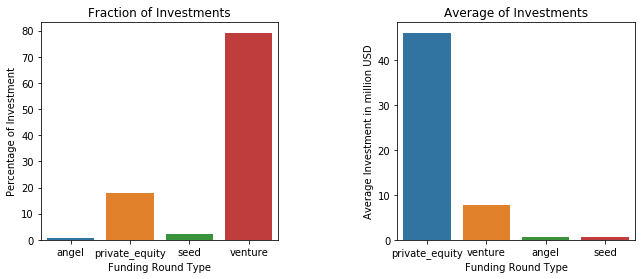

In [41]:
plt.subplot(1,2,1)
plt.title('Fraction of Investments')
sns1 = sns.barplot(x=InvType_plot_pd.index, y=InvType_plot_pd)
sns1.set(xlabel='Funding Round Type', ylabel='Percentage of Investment')

plt.subplot(1,2,2)
plt.title('Average of Investments')
sns2 = sns.barplot(x=fundType_Inv_view.index, y=fundType_Inv_view/(10e+5))
sns2.set(xlabel='Funding Round Type', ylabel='Average Investment in million USD')

plt.subplots_adjust(wspace=0.5, right = 1.5)

plt.show()


### 6.2 Plot of Top 9 countries per total investment amount

[Text(0, 0.5, 'Total Investment in billion USD'), Text(0.5, 0, 'Country Code')]

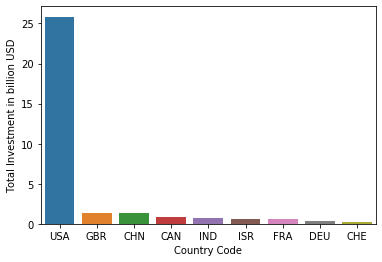

In [42]:
sns3 = sns.barplot(x=top9_grp.index, y=top9_grp/(10e+9))
sns3.set(xlabel='Country Code', ylabel='Total Investment in billion USD')

### 6.3 Plot of total investment count for top 3 sectors of the top 3 countries

In [43]:
#Join all the D1, D2, D3 dataframes
top3_sector_df = pd.concat([D1_top3_sector,D2_top3_sector,D3_top3_sector], axis=0)

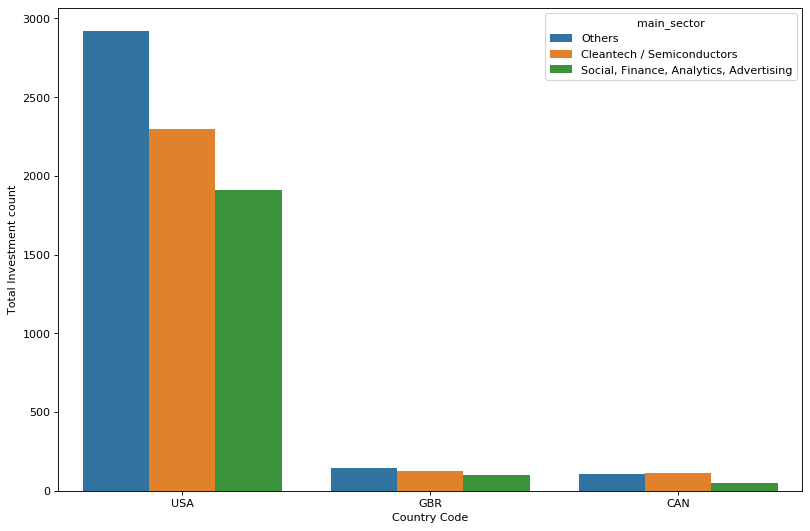

In [44]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns4 = sns.barplot(x='country_code', y='Sector_count', hue='main_sector', data=top3_sector_df)
sns4.set(xlabel='Country Code', ylabel='Total Investment count')
plt.show()